In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 2️ Load enriched data from Level 2
df_enriched = pd.read_csv('output/Railway_info_enriched.csv')

print(" Enriched data loaded!")
print(df_enriched.head())

 Enriched data loaded!
   Train_No    Train_Name Source_Station_Name  \
0       107  SWV-MAO-VLNK     SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV         MADGOAN JN.   
2       128  MAO-KOP SPEC         MADGOAN JN.   
3       290  PALACE ON WH   DELHI-SAFDAR JANG   
4       401  BSB BHARATDA          AURANGABAD   

             Destination_Station_Name       days  Num_Days Train_Category  
0                         MADGOAN JN.   Saturday         1        Weekend  
1                     SAWANTWADI ROAD     Friday         1        Weekday  
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday         1        Weekday  
3                   DELHI-SAFDAR JANG  Wednesday         1        Weekday  
4                        VARANASI JN.   Saturday         1        Weekend  


In [13]:
# Step 1: Split days
df_expanded = df_enriched.copy()
df_expanded['days_list'] = df_expanded['days'].str.split(',')

In [4]:
# Step 2: Explode to multiple rows
df_exploded = df_expanded.explode('days_list')
df_exploded['days_list'] = df_exploded['days_list'].str.strip()

print("\n Expanded rows per day:")
print(df_exploded.head())



 Expanded rows per day:
   Train_No    Train_Name Source_Station_Name  \
0       107  SWV-MAO-VLNK     SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV         MADGOAN JN.   
2       128  MAO-KOP SPEC         MADGOAN JN.   
3       290  PALACE ON WH   DELHI-SAFDAR JANG   
4       401  BSB BHARATDA          AURANGABAD   

             Destination_Station_Name       days  Num_Days Train_Category  \
0                         MADGOAN JN.   Saturday         1        Weekend   
1                     SAWANTWADI ROAD     Friday         1        Weekday   
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday         1        Weekday   
3                   DELHI-SAFDAR JANG  Wednesday         1        Weekday   
4                        VARANASI JN.   Saturday         1        Weekend   

   days_list  
0   Saturday  
1     Friday  
2     Friday  
3  Wednesday  
4   Saturday  


In [14]:
# Step 3: Count number of trains per day
day_counts = df_exploded['days_list'].value_counts().sort_index()

print("\n Train count per day of week:")
print(day_counts)



 Train count per day of week:
days_list
Friday        1471
Fridayd        178
Monday        1342
Mondayd        161
Saturday      1441
Saturdayd      152
Sunday        1432
Sundayd        170
Thursday      1372
Thursdayd      154
Tuesday       1454
Tuesdayd       174
Wednesday     1448
Wednesdayd     164
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_7640\3382086081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


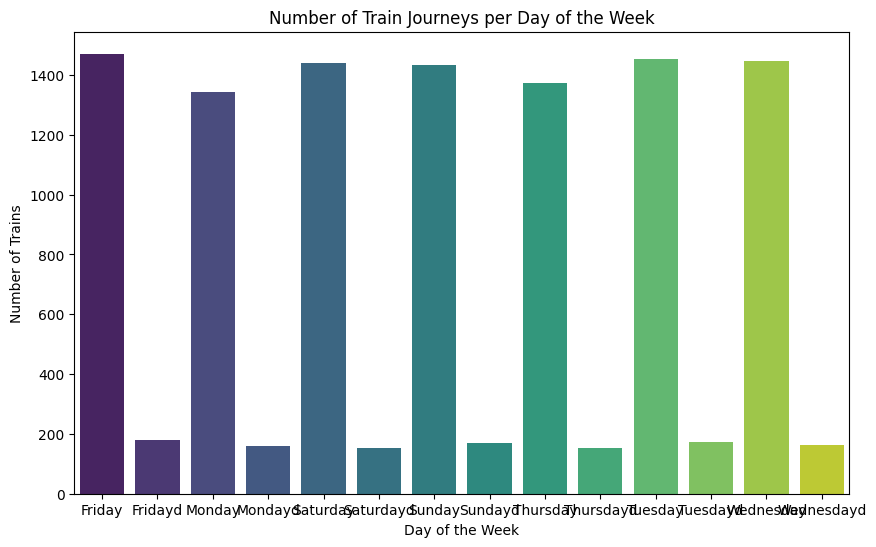

In [6]:
# Step 4: Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Number of Train Journeys per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trains')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7640\2511511056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='magma')


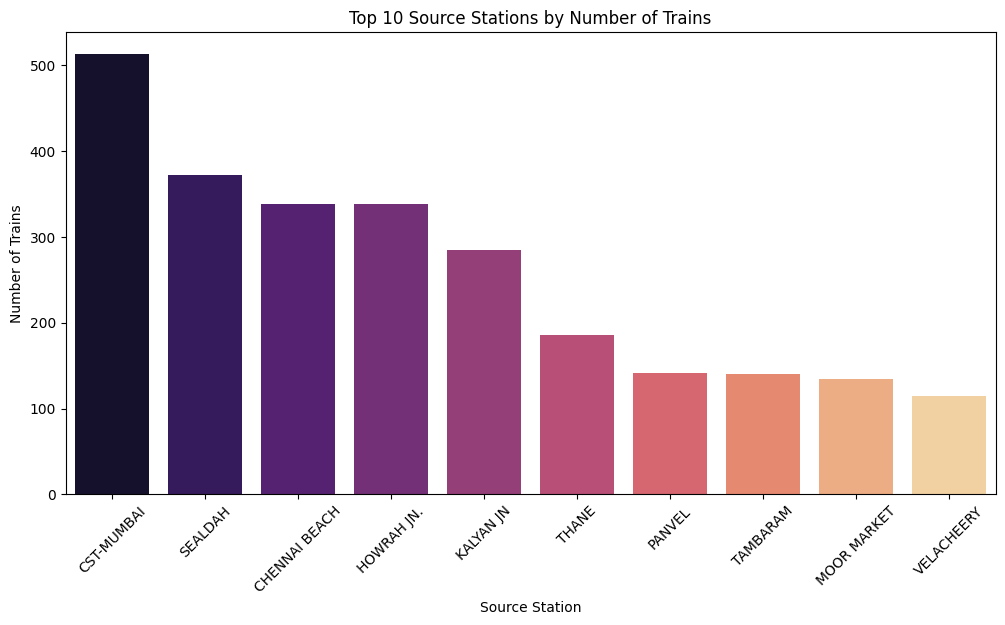

In [15]:
# Top 10 source stations with highest number of trains
source_counts = df_enriched['Source_Station_Name'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='magma')
plt.title('Top 10 Source Stations by Number of Trains')
plt.xlabel('Source Station')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7640\1909861398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=destination_counts.index, y=destination_counts.values, palette='coolwarm')


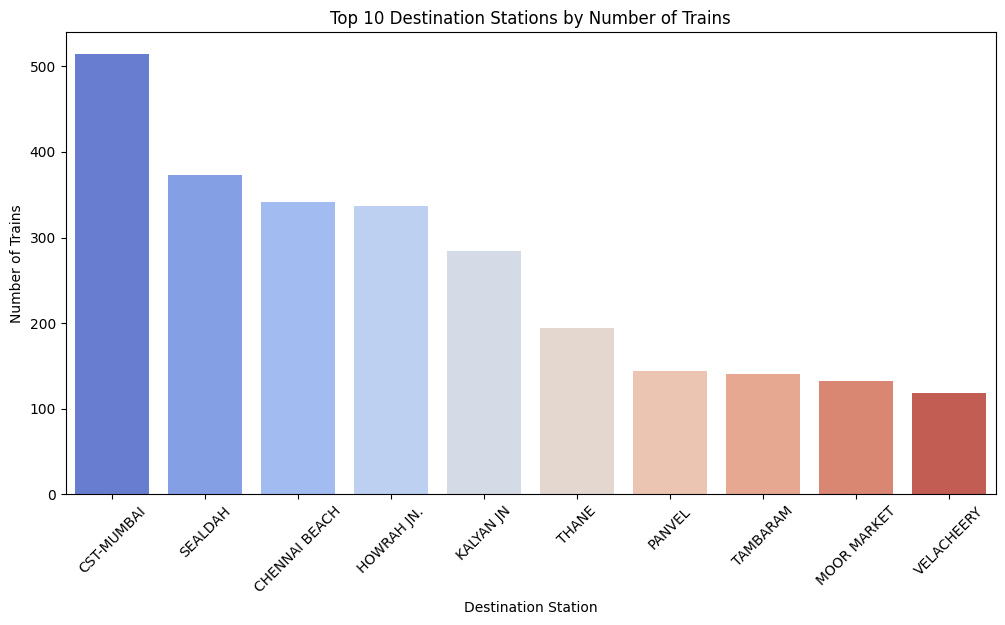

In [8]:
# Top 10 destination stations
destination_counts = df_enriched['Destination_Station_Name'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=destination_counts.index, y=destination_counts.values, palette='coolwarm')
plt.title('Top 10 Destination Stations by Number of Trains')
plt.xlabel('Destination Station')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Since days are categorical, we can compare counts only

print("\n Number of trains per day:")
print(day_counts)

# Show as percentage
total_trains = day_counts.sum()
day_percentage = (day_counts / total_trains) * 100
print("\n Percentage of trains per day:")
print(day_percentage)


 Number of trains per day:
days_list
Friday        1471
Fridayd        178
Monday        1342
Mondayd        161
Saturday      1441
Saturdayd      152
Sunday        1432
Sundayd        170
Thursday      1372
Thursdayd      154
Tuesday       1454
Tuesdayd       174
Wednesday     1448
Wednesdayd     164
Name: count, dtype: int64

 Percentage of trains per day:
days_list
Friday        13.236750
Fridayd        1.601728
Monday        12.075947
Mondayd        1.448754
Saturday      12.966796
Saturdayd      1.367767
Sunday        12.885809
Sundayd        1.529740
Thursday      12.345901
Thursdayd      1.385764
Tuesday       13.083776
Tuesdayd       1.565734
Wednesday     13.029785
Wednesdayd     1.475749
Name: count, dtype: float64



 INSIGHTS & RECOMMENDATIONS:

1️⃣ The distribution shows which days have more or fewer trains.
2️⃣ If weekends (Sat, Sun) have significantly fewer trains, 
   railway planners may adjust capacity for peak weekdays.
3️⃣ Some source/destination stations handle a large share of traffic.
   Investment in infrastructure should prioritize these high-traffic stations.
4️⃣ Consider adding extra trains or special services on high-demand days.



C:\Users\DELL\AppData\Local\Temp\ipykernel_7640\2994010870.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_percentage.index, y=day_percentage.values, palette='crest')


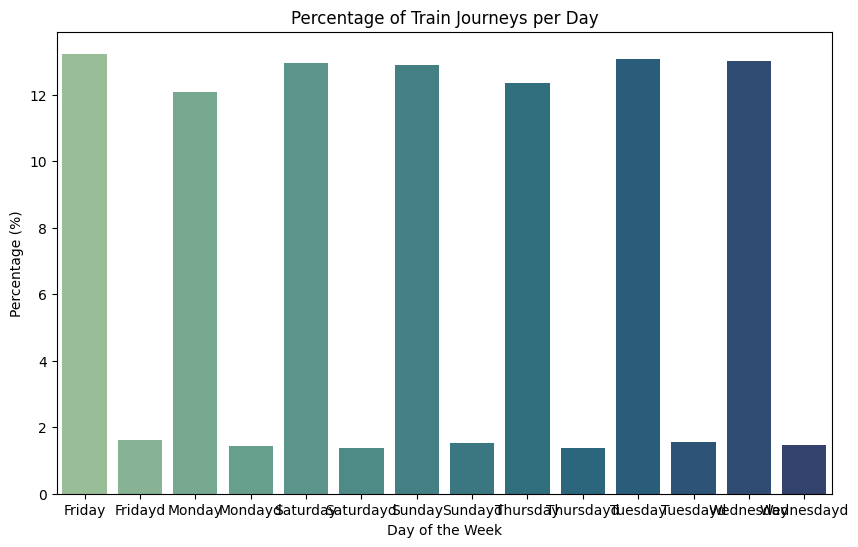

In [11]:
# Insights:
print("\n INSIGHTS & RECOMMENDATIONS:")
print("""
1️⃣ The distribution shows which days have more or fewer trains.
2️⃣ If weekends (Sat, Sun) have significantly fewer trains, 
   railway planners may adjust capacity for peak weekdays.
3️⃣ Some source/destination stations handle a large share of traffic.
   Investment in infrastructure should prioritize these high-traffic stations.
4️⃣ Consider adding extra trains or special services on high-demand days.
""")

# Plot percentage
plt.figure(figsize=(10,6))
sns.barplot(x=day_percentage.index, y=day_percentage.values, palette='crest')
plt.title('Percentage of Train Journeys per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage (%)')
plt.show()